In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Computational Exercise 2: Visualizing the Electric Field
In this exercise, we're going to use Python to visualize the E-Field using both a vector field and the field lines. **Please write a script which generates a plot of each of these for two point charges**

Once you've written that, **try plugging in different values for the locations and sizes of the charges. Can you identify any interesting behavior of the field?**

There are a couple parts of this that take some more involved python usage, so some tips are included below:

## Vector Plots
To make a vector plot, use [plt.quiver](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.quiver.html). The easiest way to use this is with [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), which takes in a N 1D arrays that represent the coordinates of a grid, and outputs N ND arrays that represent coordinate grids. 

With <em>plt.quiver(X, Y, U, V)</em>, the first pair of arguments (X, Y) define the arrow locations, and the second pair of arguments (U, V) set the length of the arrows. U and V refer to the X and Y components, respecively.

Another fun thing that you can do with plt.quiver is to change the color. The fifth argument (or the third argument, if you don't use X and Y positional arrays, which are technically optionally, though highly recommended by me) is for an additional meshgrid that defines the color on a numerical scale. To change the color scheme, you can use the keyword argument cmap. For colormap options, see [this document from matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)

Below is some sample code that may help you with this implimentation.

The shape of the orginal array "x" is (50,), while the shape of the meshgrid X is (50, 50)


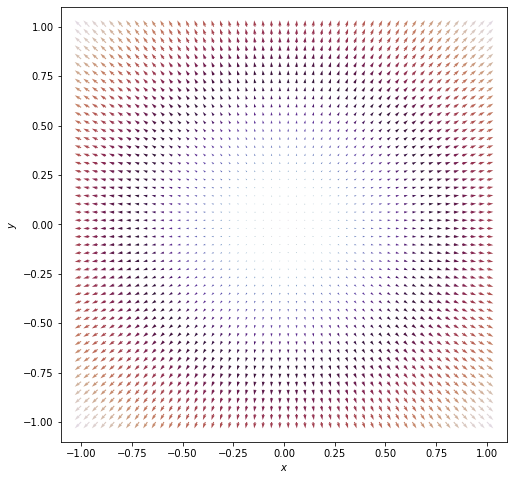

In [2]:
#Generate a one-dimensional array
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

#Convert 1D arrays to 2D meshgrids
X, Y = np.meshgrid(x, y)
print("The shape of the orginal array \"x\" is %s, while \
the shape of the meshgrid X is %s" %(x.shape, X.shape))

#Plot Vector Grid
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(111)
ax1.quiver(X, Y, X, Y, np.sqrt(X**2+Y**2), cmap='twilight')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

plt.show()

## Streamline Plots
To make a field line plot, use [plt.streamplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html#matplotlib.pyplot.streamplot). 

With <em>plt.streamplot(x, y, U, V)</em>, x and y are 1D arrays that define the grid that the lines are drawn on, and U and V are meshgrids which give the x- and y-velocities, respectively.

Similarly to plt.quiver, you can add a keyword argument color to set a 2D array or meshgrid for the colors, and use the cmap argument to govern the color scheme

It's worth a note that the lines in the streamplot end, which the lines of the electric field do not. This is because there is a maximum density of the lines. To change the density, you can use the density keyword argument, as seen below.

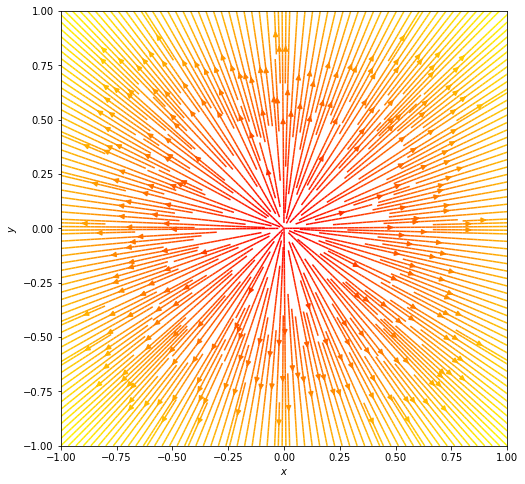

In [3]:
#Generate a one-dimensional array
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

#Convert 1D arrays to 2D meshgrids
X, Y = np.meshgrid(x, y)

#Plot Vector Grid
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(111)
ax1.streamplot(X, Y, X, Y, density=4, 
               color=np.sqrt(X**2 + Y**2), cmap='autumn')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

plt.show()

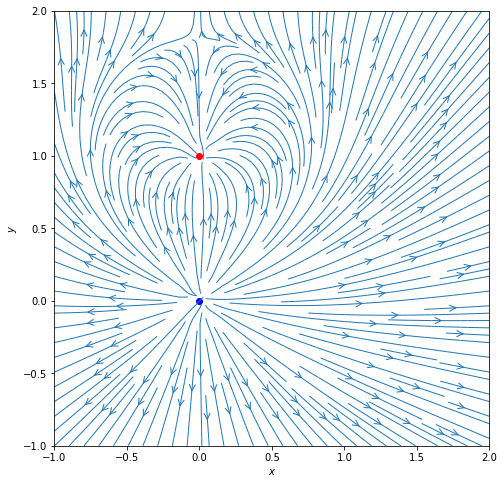

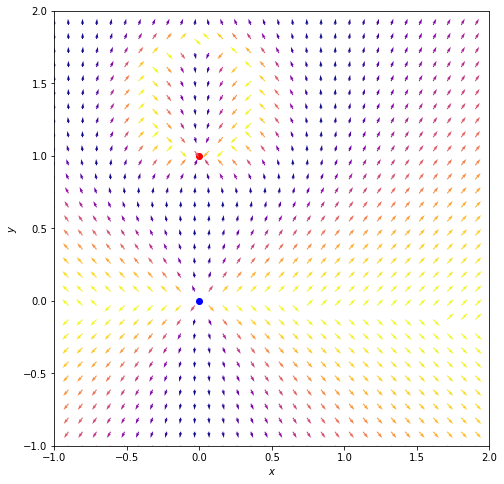

In [4]:
#/
def E(q, q_loc, r0):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    #Unpack Variables
    qx = q_loc[0]
    qy = q_loc[1]
    px = r0[0]
    py = r0[1]
    
    #Find the distances so that we can get the vector components
    x = px - qx
    y = py - qy
    hyp = np.sqrt(x**2 + y**2)
    
    #Calculate E-field components
    e = (k * q) / ((px - qx)**2 + (py - qy)**2)
    ex = e * (x/hyp)
    ey = e * (y/hyp)
    
    return ex, ey

def color(q):
    """Totally unnecessary code to  make it easy to have negative and
    positive charges be different colors"""
    if np.sign(q) >= 1:
        return 'b'
    elif np.sign(q) < 1:
        return 'r'

#Define constants, locations, and charges
k = 8.99 * 10**9 #Coulomb's constant in Nm^2/C^2

q1_loc = (0, 0)
q1 = 5

q2_loc = (0, 1)
q2 = -1

#Create set of points
res = 32 #Resolution
x = np.linspace(-1, 2, res)
y = np.linspace(-1, 2, res)
X, Y = np.meshgrid(x, y)

#Initialize the vector grids
Ex, Ey = np.meshgrid(x, y)

#Find E at each point in the grid
for i in range(res):
    for j in range(res):
        e1x, e1y = E(q1, q1_loc, (x[i], y[j]))
        e2x, e2y = E(q2, q2_loc, (x[i], y[j]))
        Ex[j,i] = e1x+e2x
        Ey[j,i] = e1y+e2y     
        
#Plot Contours  
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111)
ax1.scatter(q1_loc[0], q1_loc[1], c=color(q1), cmap='bwr')
ax1.scatter(q2_loc[0], q2_loc[1], c=color(q2), cmap='bwr')


ax1.streamplot(x, y, Ex, Ey, 
               linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_xlim(-1,2)
ax1.set_ylim(-1,2)
ax1.set_aspect('equal')
plt.show()

#Normalize vectors, multiplying them to make them easier to see
Ex = 10*Ex/np.sqrt(Ex**2 + Ey**2)
Ey = 10*Ey/np.sqrt(Ex**2 + Ey**2)


#Plot Vector Grid
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(111)
ax2.scatter(q1_loc[0], q1_loc[1], c=color(q1), cmap='bwr')
ax2.scatter(q2_loc[0], q2_loc[1], c=color(q2), cmap='bwr')

ax2.quiver(X, Y, Ex, Ey, np.sqrt(Ex**2+Ey**2), cmap='plasma')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_xlim(-1,2)
ax2.set_ylim(-1,2)
ax2.set_aspect('equal')
plt.show()


#/

# Bonus/For Fun
As you've seen in past classes, one of the things that makes python so powerful is that it's generalizable. In the code you just wrote, you can change the size and locations of the charges and see how the field changes. It should be relatively straightforward to make your code work for N charges. Give it a shot!

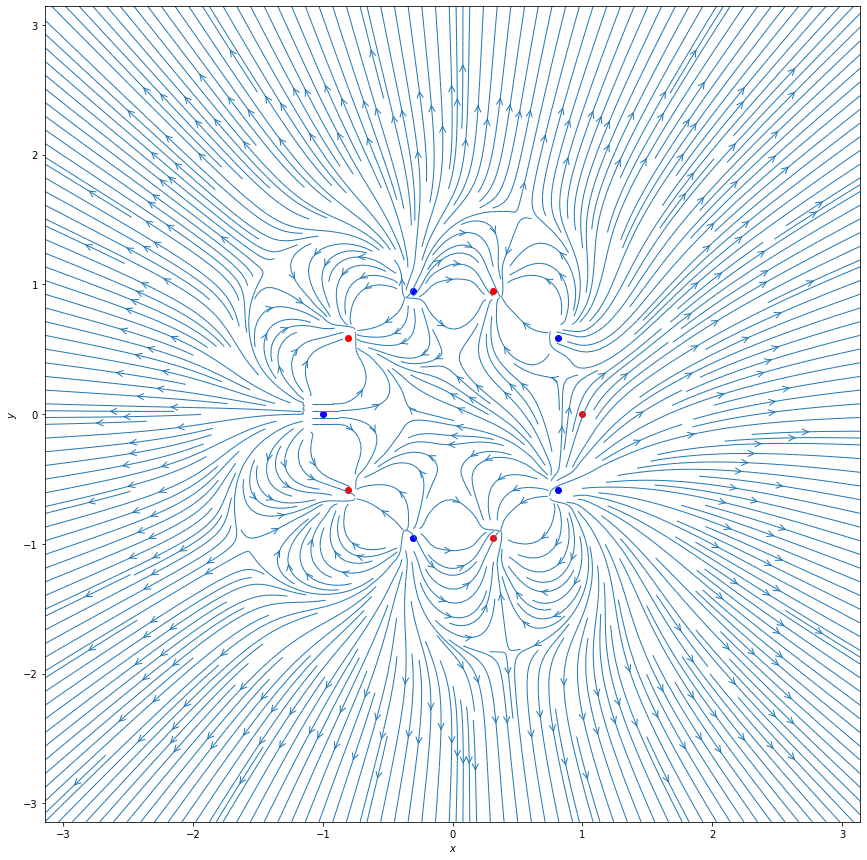

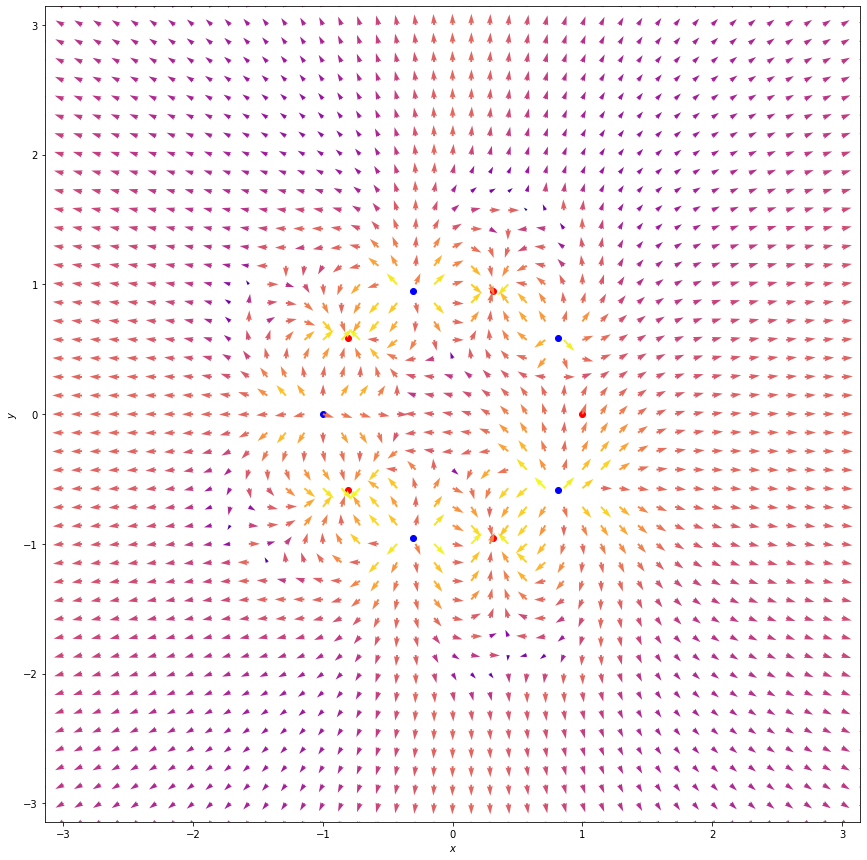

In [52]:
#/
def E(q, r0, q_loc):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    #Unpack Variables
    qx = q_loc[0]
    qy = q_loc[1]
    px = r0[0]
    py = r0[1]
    
    #Find the distances so that we can get the vector components
    x = qx - px
    y = qy - py
    hyp = np.sqrt(x**2 + y**2)
    
    #Calculate E-field components
    e = (k * q) / ((px - qx)**2 + (py - qy)**2)
    ex = e * (x/hyp)
    ey = e * (y/hyp)
    
    return ex, ey

def color(q):
    """Totally unnecessary code to  make it easy to have negative and
    positive charges be different colors"""
    if np.sign(q) >= 1:
        return 'b'
    elif np.sign(q) < 1:
        return 'r'

class Charge:
    def __init__(self, q, loc):
        self.q = q #float/int
        self.loc = loc #tuple
        
        
#Define constants, locations, and charges
k = 8.99 * 10**9 #Coulomb's constant in Nm^2/C^2

n = 10 #number of charges

charges = []

#Generate a circle of alternating charges
for i in range(n):
    q = i%2 * 2 - 1
    newcharge = Charge(q, ((np.cos(2*np.pi*i/n), np.sin(2*np.pi*i/n))))
    charges.append(newcharge)


#Create set of points
res = 45 #Resolution
margin = 1
x = np.linspace(-1* margin*np.pi, margin*np.pi, res)
y = np.linspace(-1* margin*np.pi, margin*np.pi, res)
X, Y = np.meshgrid(x, y)

#Initialize the vector grids
Ex, Ey = np.meshgrid(x, y)

#Find E at each point in the grid
for i in range(res):
    for j in range(res):
        for k in range(n):
            ex, ey = E(charges[k].q, charges[k].loc, (x[i], y[j]))
            Ex[j,i] += ex
            Ey[j,i] += ey     
        
#Plot Contours  
fig1 = plt.figure(figsize=(15, 15))
ax1 = fig1.add_subplot(111)
for k in range(len(charges)):
    ax1.scatter(charges[k].loc[0], charges[k].loc[1], 
                c=color(charges[k].q), cmap='bwr')


ax1.streamplot(x, y, Ex, Ey, 
               linewidth=1, density=4, arrowstyle='->', arrowsize=1.5)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_xlim(-1* margin*np.pi, margin*np.pi)
ax1.set_ylim(-1* margin*np.pi, margin*np.pi)
ax1.set_aspect('equal')
plt.show()

#Normalize vectors, multiplying them to make them easier to see
Ex = 10*Ex/np.sqrt(Ex**2 + Ey**2)
Ey = 10*Ey/np.sqrt(Ex**2 + Ey**2)


#Plot Vector Grid
fig2 = plt.figure(figsize=(15, 15))
ax2 = fig2.add_subplot(111)
for k in range(len(charges)):
    ax2.scatter(charges[k].loc[0], charges[k].loc[1], 
                c=color(charges[k].q), cmap='bwr')

ax2.quiver(X, Y, Ex, Ey, np.sqrt(Ex**2+Ey**2), cmap='plasma')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_xlim(-1* margin*np.pi, margin*np.pi)
ax2.set_ylim(-1* margin*np.pi, margin*np.pi)
ax2.set_aspect('equal')
plt.show()


#/